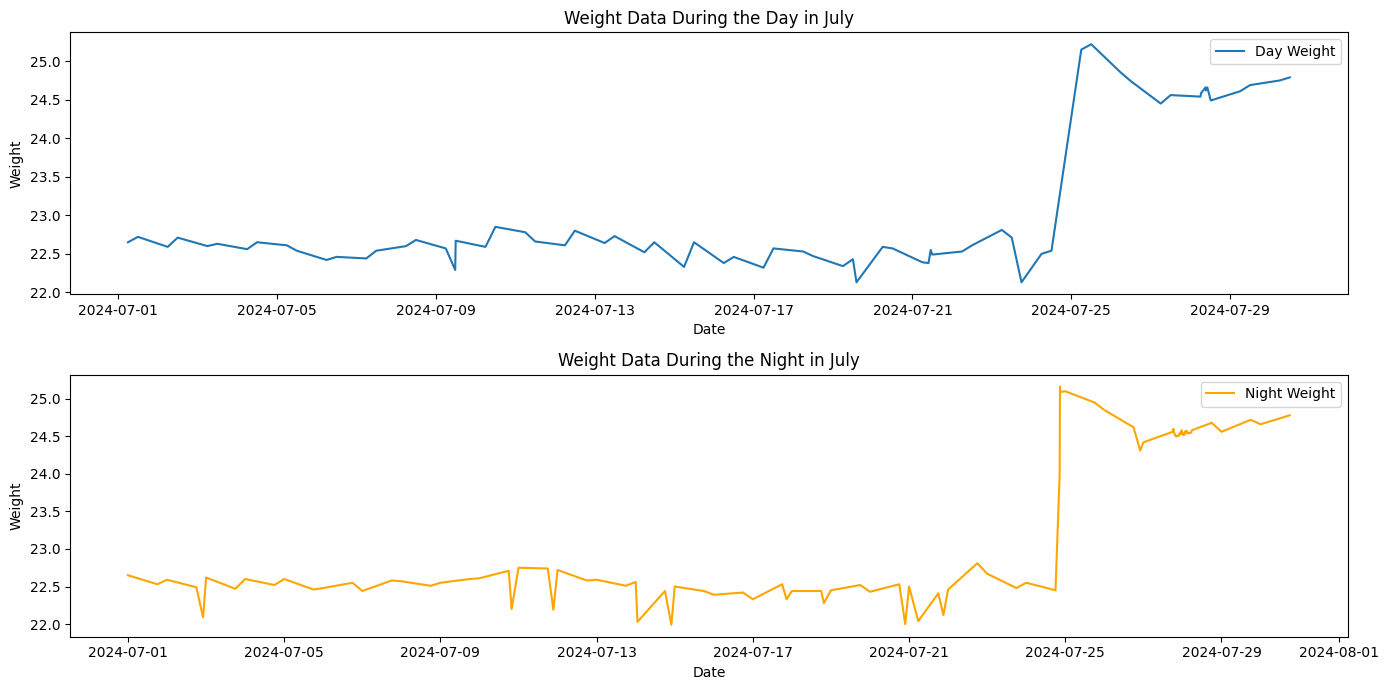

In [7]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = '/content/sample_data/hive_weights.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

# Check if 'record' column exists (since it contains the weight)
if 'record' not in df.columns:
    raise ValueError("The 'record' column (containing weight) is missing from the CSV file.")

# Convert 'created_at' to datetime
df['created_at'] = pd.to_datetime(df['created_at'])

# Filter records for July
df_july = df[df['created_at'].dt.month == 7]

# Define the function to classify day and night
def classify_day_night(timestamp):
    hour = timestamp.hour
    if 18 <= hour or hour < 6:
        return 'Night'
    else:
        return 'Day'

# Apply the function to classify records
df_july['time_of_day'] = df_july['created_at'].apply(classify_day_night)

# Separate the records into day and night
day_records = df_july[df_july['time_of_day'] == 'Day']
night_records = df_july[df_july['time_of_day'] == 'Night']

# Plot the weight values for day records
plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.plot(day_records['created_at'], day_records['record'], label='Day Weight') # Use 'record' for weight
plt.title('Weight Data During the Day in July')
plt.xlabel('Date')
plt.ylabel('Weight')
plt.legend()

# Plot the weight values for night records
plt.subplot(2, 1, 2)
plt.plot(night_records['created_at'], night_records['record'], label='Night Weight', color='orange') # Use 'record' for weight
plt.title('Weight Data During the Night in July')
plt.xlabel('Date')
plt.ylabel('Weight')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()